# _Проектная работа №1_
# _по предмету "Основы математического моделирования"_
## _Брагиной Анны, 327_
## _Задача №3_

### _Постановка задачи_
Используя схему бегущего счета и итерационные методы, решить задачу для квазилинейного уравнения переноса:

$$\begin{equation}
 \left\{
\begin{aligned}
& \frac{\partial u}{\partial t} +2t\frac{\partial u}{\partial x}= 3tu^{2}, 0<x \leq \frac{\pi}{2}, 0<t<\frac{1}{2},\\
& u(x,0)=2sin2x\\
& u(0,t)=-\frac{2sin2t^{2}}{1+3t^{2}sin2t^{2}}
\end{aligned} \right. \label{eq1}
\end{equation} $$

### _Исследование характеристик_
Наша задача - квазилинейное уравнения переноса. В точке $(x,t)=(0,0)$ значение функции $u=0$, то есть граничные и начальные условия согласованы. 
Также функция $\varphi(x)$ является монотонно неубывающей, а функция $\eta(t)$ - монотонно невозрастающей. Поэтому решение нашей задачи должно быть неразрывным.
Найдем характиристики задачи и проверим, пересекаются ли они:
$$dt=\frac{dx}{2t}=\frac{du}{3tu^{2}} \Rightarrow x-t^{2}=C  \Rightarrow x-x_0=t^{2}-t_0^{2}$$ 
где $t_0$ и $x_0$ определяются из начальных условий.

Изобразим проекции характеристик в заданных областях.

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import*  
from IPython.display import Image 

Зададим границы инервалов на графике проекций характеристик:

In [2]:
x_start = 0
x_end = pi/2
t_start = 0
t_end = 1
how_many = 15 # количество характеристик

Определим функцию, которая позволит построить два семейства характеристик, задаваемых граничными и начальными условиями. Массивы значений $x_0$ и $t_0$ будем брать равномерно распределенными на заданном интервале:

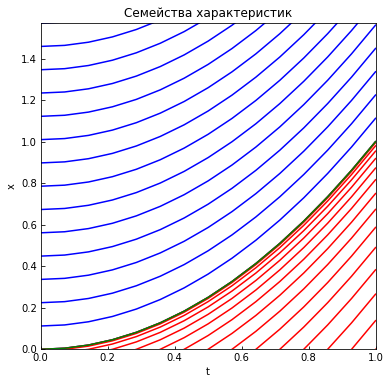

In [3]:
def plot_characteristics(x_start, x_end, t_start, t_end, how_many):
        fig, ax =plt.subplots(figsize=(6,6))
        plt.ylim(x_start,x_end)
        plt.xlim(t_start, t_end)
        plt.title('Семейства характеристик')
        plt.xlabel('t')
        plt.ylabel('x')
        x_array = np.linspace(x_start, x_end, how_many)
        t_array = np.linspace(t_start, t_end, how_many)
        for x0 in x_array:
            plt.plot(t_array, t_array**2+x0, color = "b")  #  Начальные условия
        
        for t0 in t_array:
            plt.plot(t_array,t_array**2-t0**2, color = "r")  #  Граничные условия
        
        plt.plot(t_array,t_array**2, color = "g") 
        ax.tick_params(axis = 'both', which = 'major', direction ='in')
plot_characteristics(x_start, x_end, t_start, t_end, how_many)

при $t_0=0$: $x=t^{2}+x0$ - являются параболами, сдвинутыми вверх по оси x, изображены на рисунке <span style="color:blue"> синим </span>.

при $x_0=0$: $x=t^{2}-t0$ - изображены <span style="color:red"> красным </span>.

при  $x_0=t_0=0$: $x=t^{2}$ - кривая, разделяющая два семейства решений, изображена <span style="color:green"> зеленым </span>.

**_Таким образом, в заданной области характеристики не пересекаются, а значит, решение единственно._**

### _Аналитическое решение задачи_

Из уравнений характеристик: $$dt=\frac{dx}{2t}=\frac{du}{3tu^{2}}$$
Получим систему уравнений: 
$$\begin{equation}
 \left\{
\begin{aligned}
& x-t^{2}=C_1\\
& \frac{2}{3u}+x=C_2\\
\end{aligned} \right. \label{eq2}
\end{equation} $$

Будем искать решение в виде неявно заданной функции: $$V(C_1,C_2)=0 \Rightarrow V(x-t^{2},\frac{2}{3u}+x)=0$$
С учетом того, что мы знаем значение функции для граничных и начальных условий, получим:
$$\begin{equation}
 \left\{
\begin{aligned}
& V(x,x+\frac{1}{3sin2x})=0, t=0\\
& V(-t^{2},-t^{2}-\frac{1}{3sin2t^{2}})=0,x=0\\
\end{aligned} \right. \label{eq3}
\end{equation} $$

Отсюда, с учетом $V(x-t^{2},\frac{2}{3u}+x)=0$, получаем следующее:
$$\frac{2}{3u}+x=x-t^{2}+\frac{1}{3sin2(x-t^{2})}$$

Таким образом, аналитическое решение имеет вид:
$$u(x,t)=\frac{2sin2(x-t^{2})}{1-3t^{2}sin(x-t^{2})}$$
### *Програмная реализация аналитического решения*
Библиотеки для построения графиков:


In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Зададим область изменения t и x, возьмем количество точек, как бы мы брали для сетки - N, J, и посчитаем значения функции в "узлах" аналитически и построи график аналитического решения.

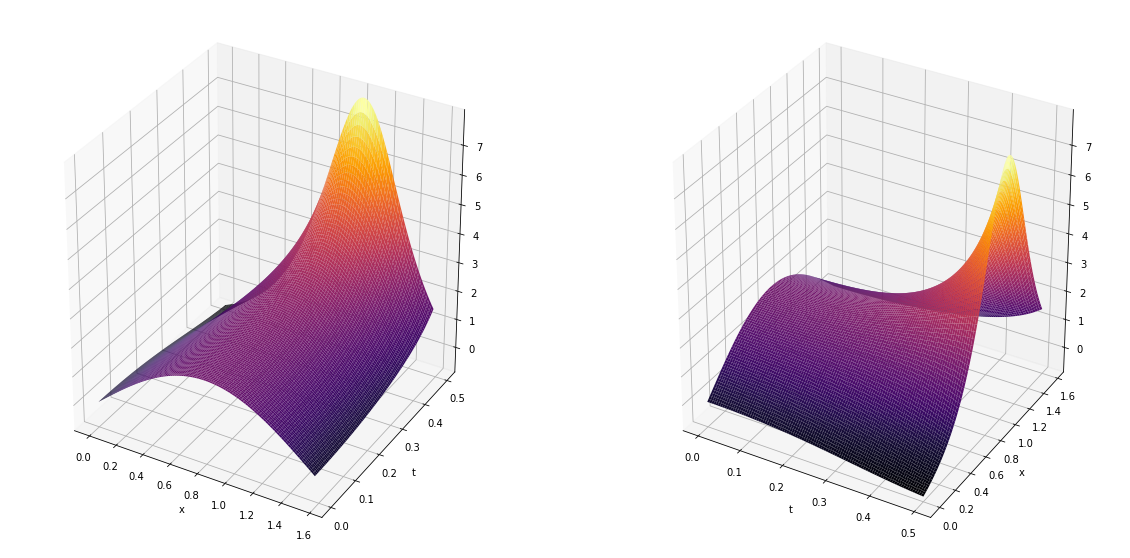

In [5]:
N = 100
J = 100
x_start = 0
x_end = pi/2
t_start = 0
t_end = 0.5
t = np.linspace(t_start,t_end,J)
x = np.linspace(x_start,x_end,N)
u1 = np.zeros((N, J), dtype=float)
for n in range(0, N):
    for j in range(0, J):
        u1[n][j] = 2*sin(2*(x[n]-t[j]**2))/(1-3*t[j]**2*sin(2*(x[n]-t[j]**2)))
t, x = np.meshgrid(t, x)
fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1, projection='3d')
surf=ax.plot_surface(x, t, u1, rstride=1, cstride=1, cmap = cm.inferno)
plt.ylabel('t')
plt.xlabel('x')
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf=ax.plot_surface(t, x, u1, rstride=1, cstride=1, cmap = cm.inferno)
plt.ylabel('x')
plt.xlabel('t')
plt.show()

## *Численное решение*

### *Метод решения*
Для решения нашей задачи будем пользоваться **методом конечных разностей**. 

Поскольку в нашей задаче коэффициент при производной $u_x$ не зависит от $u$: $c(x,t)=2t$, а правая часть представляет собой неоднородность вида $f(x,t,u)=3tu^{2}$, не зависящую от дифференциальных операторов, то в нашем случае получается:
$$\frac{\partial u}{\partial t}+c(x,t) \frac{\partial u}{\partial x}=f(x,t,u)$$

Таким образом, если отбросить неоднородность, получим **однородную начально-краевую задачу для линейного уравнения переноса**:
$$\frac{\partial u}{\partial t}+c(x,t) \frac{\partial u}{\partial x}=0$$

Устойчивость данной задачи позволит нам сделать вывод об устойчивости исходной задачи, поэтому будем выбирать шаблон для линейной задачи и исследовать его на устойчивость, тем самым обеспечивая устойчивость первоначальной задачи.

### *Построение разностной схемы*
Введем в расчетной области равномерную сетку:
$$\overline{\omega_{h,\tau}}=\big\{x_n=nh, t_j=j\tau, i=\overline{0,N}, j=\overline{0,J}\big\}$$
где $h,\tau$- шаги по координате и времени соответственно, $N,J$ - число узлов по осям $x,t$ соответственно.

Введем на $\overline{\omega_{h,\tau}}$ сеточную функцию: $y_n^j=u(x_n,t_j)$.

В нашей задаче для построения разностной схемы будем пользоваться **трехточечным шаблоном**, поскольку для линейного уравнения переноса он является **безусловно устойчивым**, а разностный оператор аппроксимирует дифференциальный с **первым порядком точности** $O(h+\tau)$. 

Поскольку наше решение является достаточно гладким и непрерывным, данный шаблон позволяет построить консервативную разностную схему и избежать проблем с ложной сходимостью.
<img src=https://bit.ly/3bp8FoA width="400">
Таким образом, **разностная задача**, аппроксимирующая исходную задачу в точке $(x_n,t_{j+1})$ , имеет следующий вид:

$$\begin{equation}
 \left\{
\begin{aligned}
&\frac{y_n^{j+1}-y_n^{j}}{\tau}+2t_{j+1}\frac{y_n^{j+1}-y_{n-1}^{j+1}}{h}=3t_{j+1}(y_n^{j+1})^2,\\
& y_n^0=2sin2x_n,  n=\overline{0,N}\\
& y_0^j=-\frac{2sin2 t_j^{2}}{1+3 t_j^{2}sin2t_j^{2}}, j=\overline{0,J}
\end{aligned} \right. \label{eq4}
\end{equation} $$

### _Метод Ньютона_
Полученную  разностную задачу будем решать с помощью **схемы бегущего счета**  .
В полученной задаче из начальных и граничных условий определены $y_n^o, y_o^j, \forall n,j$. Таким образом, неизвестным является $y_n^{j+1}$. 

Запишем уравнение в неявном виде: $$f(y_n^{j+1})=0$$

где $f(y_n^{j+1})=(\frac{2t_{j+1}}{h}+\frac{1}{\tau})y_n^{j+1}-3t_{j+1}(y_n^{j+1})^2-\frac{1}{\tau}(y_n^{j})-\frac{2t_{j+1}}{h}y_{n-1}^{j}$

Будем решать задачу **итерационным методом Ньютона**. Нужно найти корень уравнения $f(v)=0$, где  $v$ - некоторая гладкая функция.

Рассмотрим начальное приближение $v_0$ к корню, и положим $v_{n+1}=v_n+\delta v$.  Тогда с ростом $n$ значения должны прближаться к исходному корню, а погрешность $\delta v$ уменьшаться.

Раскладывая в ряд Тейлора уравнение и применяя линеаризацию, получаем:
$$f(v_{n+1})=f(v_n+\delta v)=f(v+n)+f'(v_n)\delta v=0 \Rightarrow \delta v=-\frac{f(v_n)}{f'(v_n)}$$

В качестве начального приближения можно взять значение сеточной функции $y$ со слоя $j$: $v_0=y_n^{j}$.

$f'$ - производная, в нашем случае: $$f'(v_n)=-6n\tau v_n+\frac{2n\tau}{h}+\frac{1}{\tau}$$

Когда мы подойдем к искомому корню с нужной нам точностью, итерационный процесс прекратится, и мы возьмем
$y_n^{j+1}$ равным последнему найденному $v_{n+1}$. То есть условие остановки итерационного процесса записывается следующим образом:
$$|v_{n+1}-v_n|\leq \varepsilon $$

###  *Исследование задачи на устойчивость* 
Поскольку в данной задаче скорость переноса $c(x,t)=2t$ зависит от времени, будем пользоваться **спектральным критерием Неймана с "замороженными" коэффициентами**.

Рассмотрим произвольную точку $(x^*,t^*)\in\overline{ \omega_{h,\tau}}$ и положим $c(x^*,t^*)=C$

Тогда, проанализируем однородное линейное уравнение переноса:
$$\frac{\partial u}{\partial t}+C\frac{\partial u}{\partial t}=0 \Rightarrow \frac{y_n^{j+1}-y_n^{j}}{\tau}+C\frac{y_n^{j+1}-y_{n-1}^{j+1}}{h}=0$$

где начальные условия имееют специальный вид: $y_n^0=e^{iqx_n}=e^{i\alpha n}$, $\alpha=qh$, $q$ - произвольное вещественное число. 

Тогда, подставляя в полученное уравнение значение $y_n^0$, получим, что  $y_n^1=\lambda e^{i\alpha n} $, и так далее, на произвольном $j$  слое получим: $y_n^j=\lambda^{j}e^{i\alpha n}$. 

Числа $\lambda$ называются множителями роста.

Подставим $y_n^j=\lambda^{j}e^{i\alpha n}$ в уравнение:
$$\frac{\lambda ^{j+1}e^{i\alpha n} -\lambda ^{j}e^{i\alpha n}}{\tau}-C\frac{\lambda ^{j+1}e^{i\alpha n} -\lambda ^{j+1}e^{i\alpha n}e^{-i\alpha}}{h}=0  $$
$$\frac{1-\frac{1}{\lambda}}{\tau}+C\frac{1-e^{-i \alpha}}{h}=0$$
Тогда: $$\lambda=\frac{1}{1+\frac{C\tau}{h}(1-e^{-i\alpha})}$$
<img src=https://bit.ly/2YUUyEy width="400">

Рассмотрим $|\lambda ^{-1}|= 1+\frac{C\tau}{h}(1-e^{-i\alpha})$  и положим $r=\frac{C\tau}{h}$. Тогда спектр значений $\lambda^{-1}$ при любых вещественных $\alpha$ представляет окружность с центром в точке $1+r$ и радиусом $r$. Поскольку в нашем случае $С>0$, то и $r>0$. Значит, окружность, заполняемая значениями $\lambda^{-1}$ расположена вне единичного круга с центром в начале координат и касается окружности единичного радиуса. 

Это значит, что $|\lambda ^{-1}|\geq1 \Rightarrow |\lambda|\leq1$, и выбранная схема является **безусловно устойчивой** при любых соотношениях между $h$ и $\tau$.

## *Програмная реализация*

### *1. Численное решение*
Запишем начальные и граничные условия:

In [6]:
from math import*

epsilon = 1e-5 # точность
x_start = 0
x_end = pi/2
t_start = 0
t_end = 0.5

tay = t_end/J # шаги 
h = x_end/N

t = np.linspace(t_start,t_end,J)
x = np.linspace(x_start,x_end,N)
u = np.zeros((N, J), dtype=float) 
for n in range(0,N):
        u[n][0] = 2*sin(2*x[n]) # начальные условия 
for j in range(0,J):
        u[0][j] = -2*sin(2*t[j]**2)/(1+3*t[j]**2*sin(2*t[j]**2)) # граничные условия

Запишем функции для определения значений $f$ и  $f'$ в узлах сетки:

In [7]:
def f1(np1, jp1): 
    j = jp1-1
    n = np1-1
    return (u[np1][jp1]-u[np1][j])/tay+2*j*tay*(u[np1][jp1]-u[n][jp1])/h-3*j*tay*u[np1][jp1]**2


In [8]:
def df1(np1, jp1):
    j = jp1-1
    return (1/tay+2*j*tay/h-3*2*j*tay*u[np1][jp1])

Реализуем метод Ньютона. Зададим начальное приближение, большее искомого $\varepsilon$. Итерационный процесс зададм в цикле:

In [9]:
eps = epsilon + 0.1 # > epsilon - начальная точность, с которой стартуем
while eps > epsilon:
    eps = 0
    for n in np.arange(N)[0:N-1]:
        for j in np.arange(J)[0:J-1]:
            ep = f1(n+1, j+1) / df1( n+1, j+1)
            u[n+1][j+1] = u[n+1][j+1] - ep
            if abs(ep) > eps:
                eps = abs(ep)

Построим численное решение:

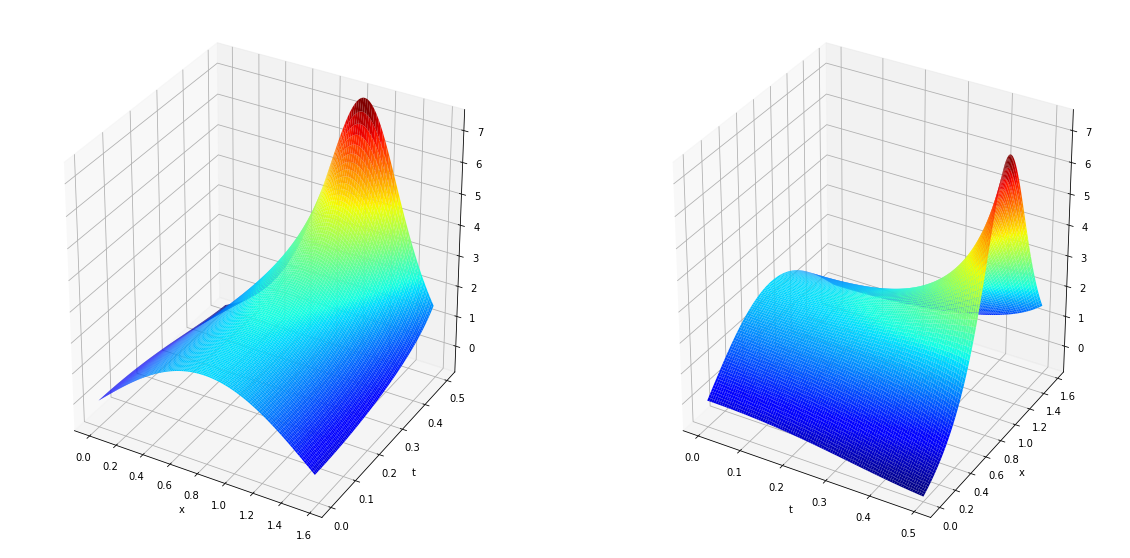

In [10]:
tn = np.linspace(t_start,t_end,J)
xm= np.linspace(x_start,x_end,N)
t, x = np.meshgrid(tn, xm)
fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1, projection='3d')
surf=ax.plot_surface(x, t, u, rstride=1, cstride=1, cmap = cm.jet)
plt.ylabel('t')
plt.xlabel('x')
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf=ax.plot_surface(t, x, u, rstride=1, cstride=1, cmap = cm.jet)
plt.ylabel('x')
plt.xlabel('t')
plt.show()

### *2. Оценка Погрешности*
Поскольку у нас есть возможность сравнить численное и аналитическое решение, построим разность решений:

$u(x,t)-y_{h,\tau}(x_n,t_j)$

<Figure size 432x288 with 0 Axes>

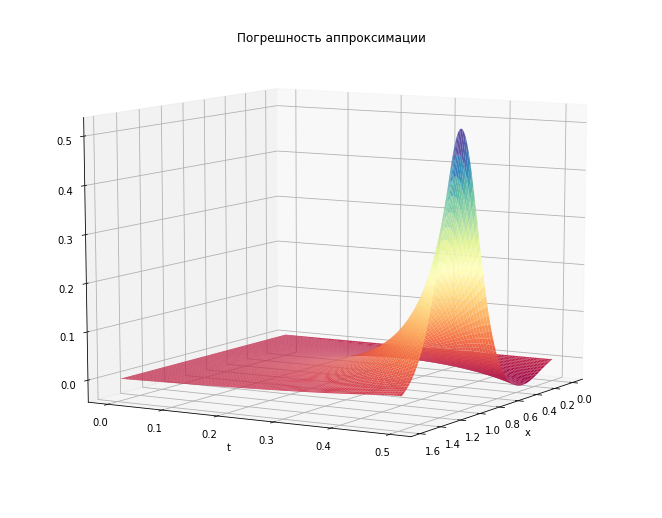

In [11]:
v = np.zeros((N, J), dtype=float)
for n in range(0, N):
    for j in range(0, J):
        v[n][j] = u1[n][j]-u[n][j]
tn = np.linspace(t_start,t_end,J)
xm = np.linspace(x_start,x_end,N)
T, X = np.meshgrid(tn, xm)
fig = plt.figure()
fig = plt.figure(figsize=(9,7))
ax = Axes3D(fig)
ax.view_init(10,30) #  первое gпо z, второе -плоскость xy
ax.plot_surface(X, T, v,rstride=1, cstride=1, cmap = cm.Spectral)
plt.xlabel('x')
plt.ylabel('t')
plt.title('Погрешность аппроксимации')
plt.show()

Видно,что наибольшая погрешность достигается при больших значениях $x$ и $t$, где скорость возрастания решения увеличивается.

### *3. Профили функции* $\textit{u(x,t)}$
При некоторых характерных значениях $\tau$ построим профили функции:

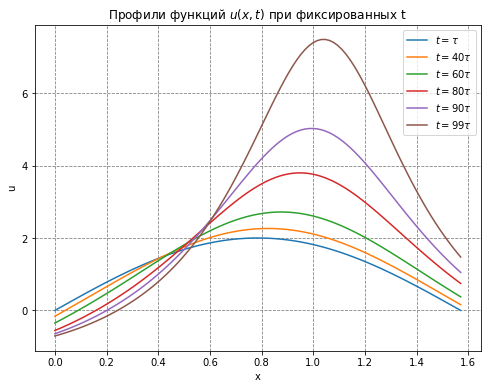

In [12]:
fig,ax=plt.subplots(figsize=(8,6))
x = np.linspace(x_start,x_end,N)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профили функций $u(x,t)$ при фиксированных t')
plt.plot(x, u[:,1],label='$t=τ$')
plt.plot(x, u[:,40],label='$t=40τ$')
plt.plot(x, u[:,60],label='$t=60τ$')
plt.plot(x, u[:,80],label='$t=80τ$')
plt.plot(x, u[:,90],label='$t=90τ$')
plt.plot(x, u[:,99],label='$t=99τ$')
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')

В данном случае профили подтверждают гладкость искомого решения и отсутствие разрывов.